<a href="https://colab.research.google.com/github/eljimenezj/CM0868--Estadistica-Multivariada-Avanzada/blob/master/Tutorial_NN_EdgarJimenez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Una introducción a las redes neuronales para principiantes

A continuación se presenta una introducciónn para el uso de redes neuronales artificiales. Esto libro hace parte de actividades evaluativas del curso de Estadistica Multivariada Avanzanda de la Maestría de Ciencia de Datos de la universidad EAFIT.

Este trabajo es presentado por
* **Edgar Leandro Jimenez Jaimes** - *eljimenezj@eafit.edu.co*




Nota: Este tutorial y código fue realizado a partir de (implementación en español):

An introduction to neural networks for beginners - By Dr Andy Thomas 

# Parte 1 -  Introduccción a las redes neuronales.

## 1.1- ¿Que son las redes neuronales?

Las redes neuronales artificiales (ANN) son implementaciones computacionales que emulan la estructura neuronal de nuestros cerebros. No necesitamos hablar sobre la compleja biología de nuestras estructuras cerebrales, pero basta con decir que el cerebro contiene neuronas que son como interruptores orgánicos. Estos pueden cambiar su estado de salida dependiendo de la fuerza de su entrada eléctrica o química. La red neuronal en el cerebro de una persona es una red de neuronas enormemente interconectadas, donde la salida de cualquier neurona dada **puede** ser la entrada a miles de otras neuronas. El aprendizaje ocurre activando repetidamente ciertas conexiones neuronales sobre otras, y esto refuerza esas conexiones. Esto los hace más propensos a producir un resultado deseado dada una entrada específica. Este aprendizaje implica retroalimentación: cuando se produce el resultado deseado, las conexiones neuronales que causan ese resultado se fortalecen.

Las redes neuronales artificiales intentan simplificar e imitar este comportamiento cerebral. Pueden ser entrenados de manera supervisada o no supervisión. En una ANN supervisada, la red se entrena proporcionando muestras de datos de entrada y salida coincidentes, con la intención de hacer que la ANN proporcione una salida deseada para una entrada dada.

El aprendizaje no supervisado en un ANN es un intento de lograr que el ANN "entienda" la estructura de los datos de entrada proporcionados "por sí mismos". Este tipo de ANN no se discutirá en este libro.

## 1.2- Estructura de una red neuronal

### 1.2.1- La neurona artificial

La neurona biológica se simula en un ANN mediante una función de activación. En las tareas de clasificación (por ejemplo, identificación de correos electrónicos no deseados), esta función de activación debe tener una característica de "encendido"; en otras palabras, una vez que la entrada es mayor que un cierto valor, la salida debe cambiar de estado, es decir, de 0 a 1, 1 a 1 o de 0 hacia > 0. Esto simula el "encendido" de una neurona biológica. Una función de activación común que se utiliza es la función sigmoidea:

$$f(z)=\frac{1}{1+e^{-z}}$$


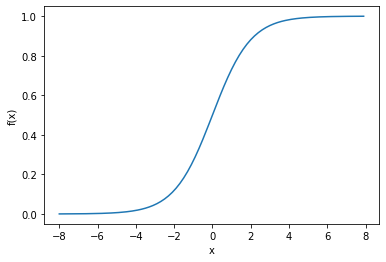

In [1]:
import matplotlib.pylab as plt
import numpy as np
x = np.arange(-8, 8, 0.1)
f = 1 / (1 + np.exp(-x))
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### 1.2.2 - Nodos

Como se mencionó anteriormente, las neuronas biológicas son redes jerárquicas conectadas, y las salidas de algunas neuronas son las entradas a otras. Podemos representar estas redes como capas conectadas de nodos. Cada nodo toma múltiples entradas ponderadas, aplica la función de activación a la suma de estas entradas y, al hacerlo, genera una salida. 

¿Qué pasa con esta idea de "peso" que se ha mencionado? Los pesos son números de valor real (es decir, no binarios 1s o 0s), que se multiplican por las entradas y luego se suman en el nodo. En otras palabras, la entrada ponderada al nodo anterior sería:

$$ x_1 w_1 + x_2 w_2 + x_3 w_3 + b  $$

Aquí los valores $w_i$ son pesos (ignore el $b$ por el momento). ¿De qué se tratan estos pesos? Bueno, son las variables que se cambian durante el proceso de aprendizaje y, junto con la entrada, determinan la salida del nodo. El $b$ es el peso del elemento de sesgo +1: la inclusión de este sesgo mejora la flexibilidad del nodo, que se demuestra mejor en un ejemplo.

### 1.2.3 - El bias

La entrada a la función de activación del nodo en este caso es simplemente $x_1 w_1 $.  ¿Qué significa cambiar $w_1$ en una red simple?

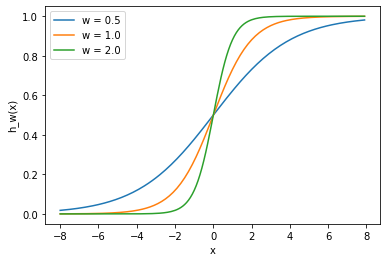

In [2]:
w1 = 0.5
w2 = 1.0
w3 = 2.0
l1 = 'w = 0.5'
l2 = 'w = 1.0'
l3 = 'w = 2.0'

for w, l in [(w1, l1), (w2, l2), (w3, l3)]:
    f = 1 / (1 + np.exp(-x*w))
    plt.plot(x, f, label=l)
    
plt.xlabel('x')
plt.ylabel('h_w(x)')
plt.legend(loc=2)
plt.show()

Aquí podemos ver que cambiar el peso cambia la pendiente de la salida de la función de activación sigmoidea, lo que obviamente es útil si queremos modelar diferentes fuerzas de las relaciones entre las variables de entrada y salida. Sin embargo, ¿qué sucede si solo queremos que la salida cambie cuando x es mayor que 1? Aquí es donde entra el sesgo: consideremos la misma red con una entrada de sesgo:

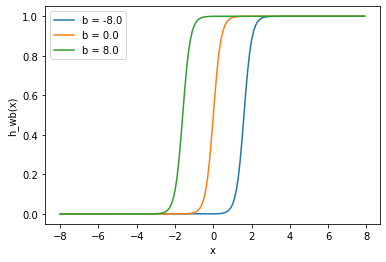

In [3]:
w = 5.0
b1 = -8.0
b2 = 0.0
b3 = 8.0
l1 = 'b = -8.0'
l2 = 'b = 0.0'
l3 = 'b = 8.0'

for b, l in [(b1, l1), (b2, l2), (b3, l3)]:
    f = 1 / (1 + np.exp(-(x*w+b)))
    plt.plot(x, f, label=l)

plt.xlabel('x')
plt.ylabel('h_wb(x)')
plt.legend(loc=2)
plt.show()

En este caso, $w_1$ se ha aumentado para simular una función de "encendido" más definida. Como puede ver, al variar el sesgo "peso" $b$, puede cambiar cuándo se activa el nodo. Por lo tanto, al agregar un término de sesgo, puede hacer que el nodo simule una función if genérica, es decir, si $(x> z)$ entonces 1 más 0. Sin un término de sesgo, no puede variar la $z$ en esa declaración `if`, lo hará estar siempre atorado alrededor de 0. Obviamente, esto es muy útil si está tratando de simular relaciones condicionales.

## 1.3- El paso hacia adelanta (The Feed-Forward pass)

### 1.3.1 Un ejemplo de retroalimentación


In [0]:
import numpy as np
w1 = np.array([[0.2, 0.2, 0.2], [0.4, 0.4, 0.4], [0.6, 0.6, 0.6]])

In [0]:
w2 = np.zeros((1, 3))
w2[0,:] = np.array([0.5, 0.5, 0.5])

In [0]:
b1 = np.array([0.8, 0.8, 0.8])
b2 = np.array([0.2])

In [0]:
def f(x):
    return 1 / (1 + np.exp(-x))

### 1.3.2 Nuestro primer intento de una función de retroalimentación


In [0]:
def simple_looped_nn_calc(n_layers, x, w, b):
    for l in range(n_layers-1):
        if l == 0:
            node_in = x
        else:
            node_in = h
        h = np.zeros((w[l].shape[0],))
        for i in range(w[l].shape[0]):
            f_sum = 0
            for j in range(w[l].shape[1]):
                f_sum += w[l][i][j] * node_in[j]
            f_sum += b[l][i]
            h[i] = f(f_sum)
    return h

In [0]:
w = [w1, w2]
b = [b1, b2]


x = [1.5, 2.0, 3.0]

In [10]:
simple_looped_nn_calc(3, x, w, b)

array([0.83545566])

### 1.3.3 Implementacion mas eficiente


In [11]:
%timeit simple_looped_nn_calc(3, x, w, b)

The slowest run took 4.80 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 22.7 µs per loop


### 1.3.5 Multiplicacion de matriz


In [0]:
def matrix_feed_forward_calc(n_layers, x, w, b):
    for l in range(n_layers-1):
        if l == 0:
            node_in = x
        else:
            node_in = h
        z = w[l].dot(node_in) + b[l]
        h = f(z)
    return h

## 1.4 DESCENSO GRADIENTE Y OPTIMIZACIÓN

### 1.4.1 Ejemplo en codigo

In [13]:
x_old = 0 
x_new = 6 
gamma = 0.01 
precision = 0.00001

def df(x):
    y = 4 * x**3 - 9 * x**2
    return y

while abs(x_new - x_old) > precision:
    x_old = x_new
    x_new += -gamma * df(x_old)

print("The local minimum occurs at %f" % x_new)

The local minimum occurs at 2.249965


## 1.5 IMPLEMENTACION DE LA RED NEURAL EN PYTHON


(1797, 64)


<Figure size 432x288 with 0 Axes>

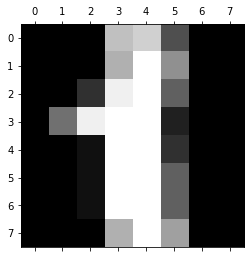

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[1]) 
plt.show()

El código anterior se imprime (1797, 64) para mostrar la forma de la matriz de datos de entrada y el dígito pixelado "1" en la imagen de arriba. El código que vamos a escribir en este tutorial de redes neuronales intentará estimar los dígitos que representan estos píxeles (usando redes neuronales, por supuesto). Lo primero es lo primero, necesitamos poner los datos de entrada en forma. Para hacerlo, necesitamos hacer dos cosas:

1. Escalar los datos
2. Divida los datos en pruebas y conjuntos de trenes.

### 1.5.1 Escalar datos


In [15]:
digits.data[0,:]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)
X[0,:]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

### 1.5.2 Crear conjuntos de datos de prueba y entrenamiento

In [0]:
from sklearn.model_selection import train_test_split
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

### 1.5.3 Configurar la capa de salida

In [0]:
import numpy as np

def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

In [19]:
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)
y_train[0], y_v_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

### 1.5.4 Creacion de la red neuronal

In [0]:
nn_structure = [64, 30, 10] 

In [0]:
def f(x):
    return 1 / (1 + np.exp(-x))

In [0]:
def f_deriv(x):
    return f(x) * (1 - f(x))

In [0]:
import numpy.random as r
def setup_and_init_weights(nn_structure):
    W = {}
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [0]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [0]:
def feed_forward(x, W, b):
    h = {1: x}
    z = {}
    for l in range(1, len(W) + 1):
        if l == 1:
            node_in = x
        else:
            node_in = h[l]
        z[l+1] = W[l].dot(node_in) + b[l] 
        h[l+1] = f(z[l+1]) 
    return h, z

In [0]:
def calculate_out_layer_delta(y, h_out, z_out):
    return -(y-h_out) * f_deriv(z_out)

In [0]:
def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

In [0]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    m = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(len(y)):
            delta = {}
            h, z = feed_forward(X[i, :], W, b)
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], h[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-h[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(h[l][:,np.newaxis])) 
                    tri_b[l] += delta[l+1]
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/m * tri_W[l])
            b[l] += -alpha * (1.0/m * tri_b[l])
        avg_cost = 1.0/m * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

In [29]:
W, b, avg_cost_func = train_nn(nn_structure, X_train, y_v_train)

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


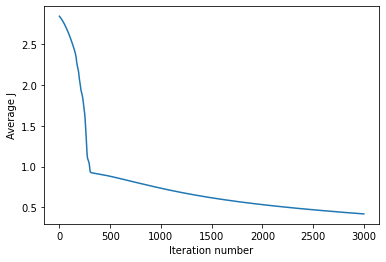

In [30]:
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

### 1.5.5 Evaluacion del modelo


In [0]:
def predict_y(W, b, X, n_layers):
    m = X.shape[0]
    y = np.zeros((m,))
    for i in range(m):
        h, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(h[n_layers])
    return y

In [32]:
from sklearn.metrics import accuracy_score
y_pred = predict_y(W, b, X_test, 3)
accuracy_score(y_test, y_pred)*100

87.20445062586927

# EJERCICIO PROPIO

Para este ejercicio se va a utilizar el dataset de Wine, que es un problema de clasificacion, de Sklearn y la aplicacion de la red neuronal. 

In [54]:
from sklearn.datasets import load_wine
wine = load_wine()
list(wine.target_names)

['class_0', 'class_1', 'class_2']

In [55]:
print(wine.data.shape)

(178, 13)


Escalamos los datos

In [56]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X = X_scale.fit_transform(wine.data)
X[0,:]

array([ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
        0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
        0.36217728,  1.84791957,  1.01300893])

Particion train test split

In [0]:
from sklearn.model_selection import train_test_split
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

Configuramos la capa de salida

In [0]:
import numpy as np

def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 3)) 
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

In [59]:
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)
y_train[0], y_v_train[0]

(2, array([0., 0., 1.]))

Configuracion de la red 

In [0]:
nn_structure = [13, 4, 3] # 13 variables de entrada, 4 neuronas, 3 salidas (target)

Realizamos el entrenamiento

In [61]:
W, b, avg_cost_func = train_nn(nn_structure, X_train, y_v_train)

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


Observemos las graficas de rendimiento

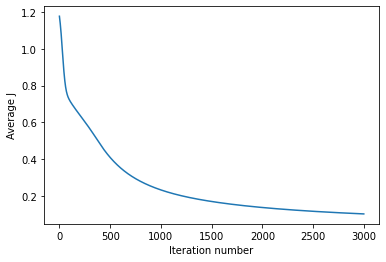

In [62]:
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

Revisemos las predicciones

In [63]:
from sklearn.metrics import accuracy_score
y_pred = predict_y(W, b, X_test, 3)
accuracy_score(y_test, y_pred)*100

95.83333333333334

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))     

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        24
           1       1.00      0.89      0.94        28
           2       1.00      1.00      1.00        20

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72



Fin prueba